In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Visualization Packages Importing
from matplotlib import pyplot as plt
import seaborn as sns
# from plotly import graph_objects as go
# from plotly import express as px
# # import plotly.plotly as py
# from plotly.offline import init_notebook_mode,iplot

# WordCloud Packages
# from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.shape

(16598, 11)

#### Exploratory Data Analysis

In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
categorical_df =  df.select_dtypes('O')
categorical_df.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


In [10]:
numerical_df = df.select_dtypes(('int', 'float'))
numerical_df.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006.0,41.49,29.02,3.77,8.46,82.74
1,1985.0,29.08,3.58,6.81,0.77,40.24
2,2008.0,15.85,12.88,3.79,3.31,35.82
3,2009.0,15.75,11.01,3.28,2.96,33.00
4,1996.0,11.27,8.89,10.22,1.00,31.37


In [11]:
categorical_features = categorical_df.columns
categorical_features

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')

In [12]:
numerical_features = numerical_df.columns
numerical_features

Index(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

In [16]:
for categorical_name in categorical_features:
    print("Column Name:", categorical_name)
    print('-' * 50)
    print('-' * 50)
    
    
    print(df[categorical_name].value_counts().head())
    print('-' * 50)
    print('-' * 50)
    

Column Name: Name
--------------------------------------------------
--------------------------------------------------
Need for Speed: Most Wanted    12
Madden NFL 07                   9
LEGO Marvel Super Heroes        9
FIFA 14                         9
Ratatouille                     9
Name: Name, dtype: int64
--------------------------------------------------
--------------------------------------------------
Column Name: Platform
--------------------------------------------------
--------------------------------------------------
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64
--------------------------------------------------
--------------------------------------------------
Column Name: Genre
--------------------------------------------------
--------------------------------------------------
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: Genre, dtype: int64
-----------

In [19]:
df[['Year', 'Publisher']].describe(include='all')

,Year,Publisher
count,16327.000000,16540
unique,NaN,578
top,NaN,Electronic Arts
freq,NaN,1351
mean,2006.406443,NaN
std,5.828981,NaN
min,1980.000000,NaN
25%,2003.000000,NaN
50%,2007.000000,NaN
75%,2010.000000,NaN


To fill in all null values

In [27]:
df['Year'] = df['Year'].fillna(df['Year'].mean())


In [28]:
df['Year'] = df['Year'].astype('int32')
df['Year']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16598, dtype: int32

In [29]:
df['Publisher'].value_counts(normalize = True)

Electronic Arts                 0.081681
Activision                      0.058948
Namco Bandai Games              0.056348
Ubisoft                         0.055683
Konami Digital Entertainment    0.050302
                                  ...   
SSI                             0.000060
Strategy First                  0.000060
Ertain                          0.000060
Enjoy Gaming ltd.               0.000060
Inti Creates                    0.000060
Name: Publisher, Length: 578, dtype: float64

In [30]:
df['Publisher'] = df['Publisher'].fillna(df['Publisher'].mode()[0])
df['Publisher']

0          Nintendo
1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: Publisher, Length: 16598, dtype: object

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

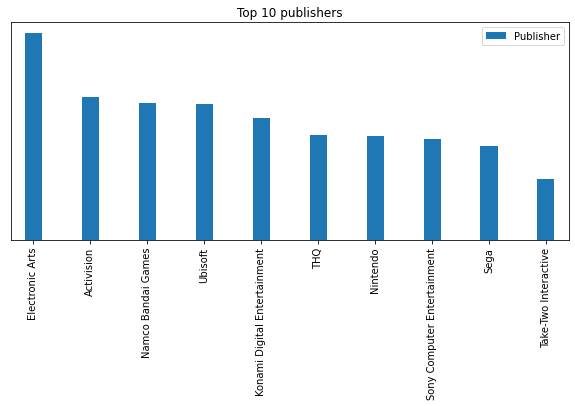

In [35]:
# Let's get the Top 10 Video Games Publishers

top_10_publishers = df.Publisher.value_counts().head(10)

ax = top_10_publishers.plot(kind= 'bar', figsize = (10,4), width = 0.3, title = 'Top 10 publishers', edgecolor = None)
plt.legend()

# plt.title() 
plt.xticks(fontsize = 10)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])


# for p in ax.patches:
#     width = p.get_width()
#     height = p.get_height()
#     x, y = p.get_xy()
# #     ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha = 'center')
#     ax.annotate('{:.0%}'.format(height),
#                (p.get_x() +.5*width, p.get_y() + height + 0.01), ha ='center')


plt.show()

Now we check the top 10 genres

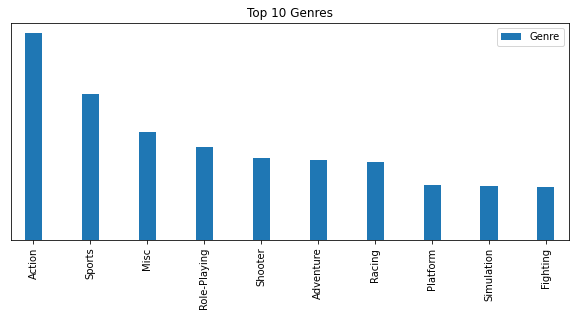

In [38]:
top_10_genres = df.Genre.value_counts().head(10)

ax = top_10_genres.plot(kind= 'bar', figsize = (10,4), width = 0.3, title = 'Top 10 Genres', edgecolor = None)
plt.legend()

# plt.title() 
plt.xticks(fontsize = 10)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

plt.show()

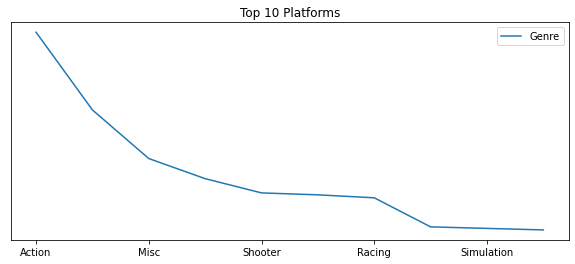

In [44]:
top_10_platforms = df.Platform.value_counts().sort_values()

ax = top_10_genres.plot(kind= 'line', figsize = (10,4), title = 'Top 10 Platforms')
plt.legend()

# plt.title() 
plt.xticks(fontsize = 10)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

plt.show()

Total number of Sales (in Millions) for North America

In [45]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [49]:
yearly_sales = df.loc[:, ['Name','Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby(by= "Year").sum()
yearly_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.77
1982,26.92,1.65,0.00,0.31,28.86
1983,7.76,0.80,8.10,0.14,16.79
1984,33.28,2.10,14.27,0.70,50.36


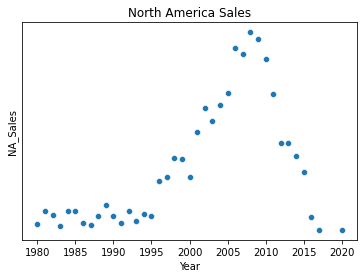

In [58]:
ax = sns.scatterplot(x =yearly_sales.index, y =yearly_sales['NA_Sales'], data = yearly_sales)
# ax = top_10_genres.plot(kind= 'line', figsize = (10,4), title = 'Top 10 Platforms')
# plt.legend()

plt.title("North America Sales") 
plt.xticks(fontsize = 10)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

plt.show()

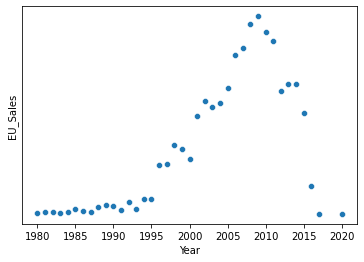

In [54]:
ax = sns.scatterplot(x =yearly_sales.index, y =yearly_sales['EU_Sales'], data = yearly_sales)
# ax = top_10_genres.plot(kind= 'line', figsize = (10,4), title = 'Top 10 Platforms')
# plt.legend()

plt.title("Europe Sales") 
plt.xticks(fontsize = 10)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

plt.show()

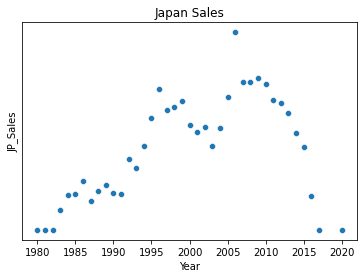

In [56]:
ax = sns.scatterplot(x =yearly_sales.index, y =yearly_sales['JP_Sales'], data = yearly_sales)
# ax = top_10_genres.plot(kind= 'line', figsize = (10,4), title = 'Top 10 Platforms')
# plt.legend()

plt.title("Japan Sales") 
plt.xticks(fontsize = 10)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

plt.show()

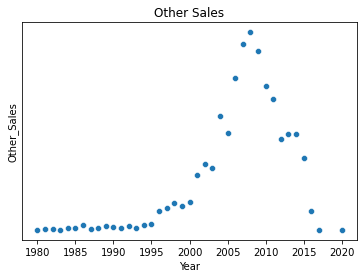

In [60]:
ax = sns.scatterplot(x =yearly_sales.index, y =yearly_sales['Other_Sales'], data = yearly_sales)
# ax = top_10_genres.plot(kind= 'line', figsize = (10,4), title = 'Top 10 Platforms')
# plt.legend()

plt.title("Other Sales") 
plt.xticks(fontsize = 10)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

plt.show()

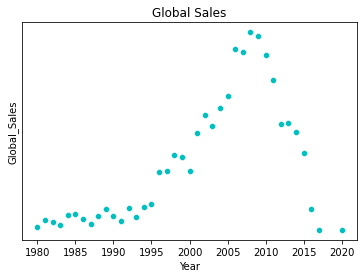

In [62]:
ax = sns.scatterplot(x ='Year', y ="Global_Sales", data = yearly_sales, color= 'c')
# ax = top_10_genres.plot(kind= 'line', figsize = (10,4), title = 'Top 10 Platforms')
# plt.legend()

plt.title("Global Sales") 
plt.xticks(fontsize = 10)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

plt.show()

In [63]:
top_sales = df.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending =False).head(10)
top_sales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
18,19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


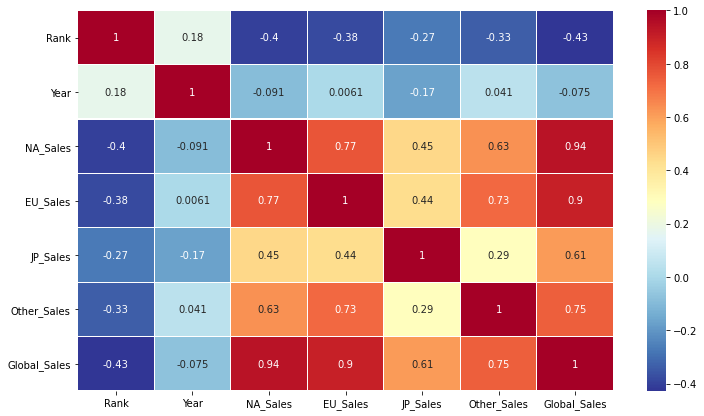

In [64]:
corr_ = df.corr()

plt.figure(figsize=(12, 7))

sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')

plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [70]:


le = LabelEncoder()
df['Platform'] = le.fit_transform(df['Platform'])
df['Genre'] = le.fit_transform(df['Genre'])

In [72]:
data = df[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

y = df['Global_Sales']

print (data.shape)
print(y.shape)

(16598, 6)
(16598,)


In [73]:
scaler = StandardScaler()

data = scaler.fit_transform(data)

X = data

print(X.shape)
print(y.shape)

(16598, 6)
(16598,)


In [76]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
yhat

array([0.10033614, 1.15038088, 0.26025727, ..., 0.0301736 , 0.35019619,
       0.31033607])

In [77]:
print(r2_score(y_test, yhat))

0.9999929147223778


In [81]:
Krange = range(1, 15, 1)

score_list= []

for i in Krange:
    knn = KNeighborsRegressor(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    
    yhat2 = knn.predict(X_test)
    
    score_list.append(r2_score(y_test, yhat2))


In [85]:
score_list

[0.8124990051991974,
 0.8095407261074494,
 0.7912696691104055,
 0.7727770462973163,
 0.7697174240353394,
 0.7580020330849656,
 0.747193301050192,
 0.7415418970464258,
 0.7359823621127572,
 0.7480240703542118,
 0.7406954504223144,
 0.7354507182767346,
 0.7306538034679186,
 0.7306863090360858]

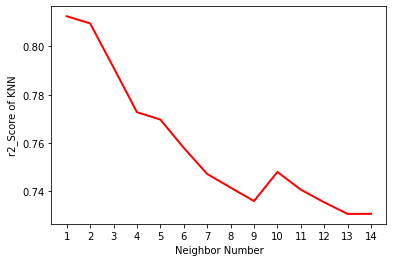

In [84]:
plt.plot(Krange, score_list, linewidth=2, color ='red')
plt.xticks(Krange)

plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show()

In [90]:
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(X_train, y_train)
yhat2 = knn.predict(X_test)
yhat2

array([0.09, 1.17, 0.22, ..., 0.03, 0.36, 0.34])

In [91]:
print(r2_score(y_test, yhat2))

0.8124990051991974


In [92]:
tree = DecisionTreeRegressor(random_state = 32)

tree.fit(X_train, y_train)
yhat3 = tree. predict(X_test)
yhat3

array([0.1  , 1.15 , 0.27 , ..., 0.025, 0.35 , 0.31 ])

In [93]:
print(r2_score(y_test, yhat3))

0.8170780351242148


In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, make_scorer


kfold=KFold(n_splits=5)
mod = RandomForestRegressor(n_estimators = 100)
model = make_pipeline(mod)
print(model)
model.fit(X_train, y_train)
score=cross_val_score(model,X,y,cv=kfold)
print(score)

yhat4 = model.predict(X_test)
print(yhat4)
print(r2_score(y_test, yhat4))
print(mean_squared_error(y_test,yhat4))
print(mean_squared_log_error(y_test,yhat4))






Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])
[-0.21414575 -1.0092132  -1.12639758 -2.27350574 -4.99858218]
[0.09959167 1.1529     0.2669     ... 0.02576    0.3502     0.31      ]
0.8130807293641977
0.7155916633727701
0.000588677735871237


In [97]:
from sklearn.svm import SVR

svr_linear = SVR(kernel='linear')
svr_rbf = SVR(kernel='rbf')


svr_linear.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)

yhat5_linear = svr_linear.predict(X_test)
yhat6_rbf = svr_rbf.predict(X_test)

print(r2_score(y_test, yhat5_linear))
print(r2_score(y_test, yhat6_rbf))

0.998498476330881
0.3962689785396415


Thanks for following!!!